Saving par_labels.npy to par_labels (1).npy
Saving par_logits.npy to par_logits (1).npy
Saving seq_labels.npy to seq_labels (1).npy
Saving seq_logits.npy to seq_logits (1).npy


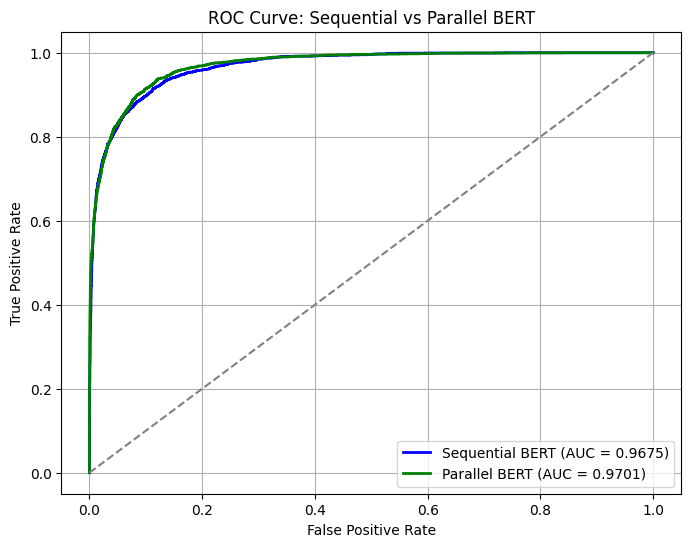

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Upload files to Colab first (seq_logits.npy, par_logits.npy, seq_labels.npy)
from google.colab import files
uploaded = files.upload()

# Load the saved logits and labels
seq_logits = np.load("seq_logits.npy")
par_logits = np.load("par_logits.npy")
y_test = np.load("seq_labels.npy")  # Both models use the same y_test

# Convert logits to probabilities using softmax
seq_probs = torch.nn.functional.softmax(torch.tensor(seq_logits), dim=1).numpy()[:, 1]
par_probs = torch.nn.functional.softmax(torch.tensor(par_logits), dim=1).numpy()[:, 1]

# Compute ROC curves and AUC scores
fpr_seq, tpr_seq, _ = roc_curve(y_test, seq_probs)
roc_auc_seq = auc(fpr_seq, tpr_seq)

fpr_par, tpr_par, _ = roc_curve(y_test, par_probs)
roc_auc_par = auc(fpr_par, tpr_par)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_seq, tpr_seq, color='blue', lw=2, label=f'Sequential BERT (AUC = {roc_auc_seq:.4f})')
plt.plot(fpr_par, tpr_par, color='green', lw=2, label=f'Parallel BERT (AUC = {roc_auc_par:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Sequential vs Parallel BERT")
plt.legend(loc="lower right")
plt.grid()
plt.show()
